# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

lat = []
lng = []
temp = []
humidity = []
wind_speed = []
cloudiness = []
country = []
date = []
new_cities = []

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append((response['coord']['lon']))
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        new_cities.append(city)
        print(f"Processing {city} found!.")
    except:
        print(f'{city} result does not exist')
        pass

Processing mataura found!.
Processing troitskaya found!.
palabuhanratu result does not exist
Processing la paz found!.
Processing iqaluit found!.
Processing provideniya found!.
Processing dingli found!.
Processing bull savanna found!.
Processing yellowknife found!.
Processing georgetown found!.
Processing caravelas found!.
mys shmidta result does not exist
Processing matamoros found!.
Processing chuy found!.
Processing hobart found!.
Processing punta arenas found!.
Processing ayan found!.
Processing pevek found!.
Processing saint george found!.
Processing shimoda found!.
Processing busselton found!.
Processing bluff found!.
Processing fortuna found!.
Processing pangnirtung found!.
Processing mar del plata found!.
Processing arraial do cabo found!.
Processing rawson found!.
Processing pacific grove found!.
Processing abu samrah found!.
Processing gamboma found!.
barentsburg result does not exist
Processing luderitz found!.
Processing cape town found!.
Processing sipote found!.
Processin

Processing nanortalik found!.
Processing rocha found!.
samalaeulu result does not exist
Processing mayumba found!.
ormos korthiou result does not exist
Processing raymond found!.
Processing sinnamary found!.
Processing doha found!.
Processing sambava found!.
Processing ishigaki found!.
Processing sarahan found!.
Processing gaujani found!.
Processing roebourne found!.
Processing pechenga found!.
Processing noumea found!.
Processing bad durkheim found!.
Processing jiuquan found!.
saleaula result does not exist
Processing raga found!.
Processing mecca found!.
Processing pasighat found!.
Processing ewa beach found!.
Processing berbera found!.
Processing beyneu found!.
Processing mathbaria found!.
Processing loukhi found!.
Processing sahuaripa found!.
Processing trebinje found!.
Processing les cayes found!.
Processing kungurtug found!.
Processing santa rosa found!.
Processing hovd found!.
Processing teahupoo found!.
Processing port lincoln found!.
Processing bundaberg found!.
Processing mur

Processing sussex found!.
Processing kholmogory found!.
Processing bella union found!.
Processing romans-sur-isere found!.
Processing harper found!.
Processing amga found!.
Processing peleduy found!.
Processing port hueneme found!.
Processing nara found!.
Processing baruun-urt found!.
Processing maraa found!.
makung result does not exist
Processing gat found!.
Processing orem found!.
ruatoria result does not exist
Processing kyren found!.
bolonchen result does not exist
Processing bowen found!.
Processing praia da vitoria found!.
Processing kizukuri found!.
Processing mercedes found!.
Processing borogontsy found!.
Processing suleja found!.
Processing ilo found!.
Processing boende found!.
saryshagan result does not exist
Processing arlit found!.
Processing road town found!.
Processing roseau found!.
Processing vastseliina found!.
Processing laguna found!.
Processing pimentel found!.
Processing korla found!.
Processing dalbandin found!.
Processing itupiranga found!.


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
weather_direct = {
    "City": new_cities,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temperature": temp,
    "Humidity": humidity,
    "Wind Speed": wind_speed,
    "Cloudiness": cloudiness,
    "Country": country,
    "Data Receiving Time (GMT)": date}
weather_info = pd.DataFrame(weather_direct)
weather_info

,City,Latitude,Longitude,Max Temperature,Humidity,Wind Speed,Cloudiness,Country,Data Receiving Time (GMT)
0,mataura,-46.19,168.86,53.01,80,5.99,100,NZ,1603923485
1,troitskaya,43.31,44.98,51.51,80,1.16,0,RU,1603923570
2,la paz,-16.50,-68.15,60.33,27,4.45,1,BO,1603923483
3,iqaluit,63.75,-68.51,10.62,90,2.66,67,CA,1603923491
4,provideniya,64.38,-173.30,25.90,87,0.60,64,RU,1603923501
...,...,...,...,...,...,...,...,...,...
554,laguna,38.42,-121.42,80.01,23,1.01,0,US,1603923319
555,pimentel,-6.84,-79.93,65.52,79,15.01,5,PE,1603923504
556,korla,41.76,86.15,46.00,64,10.89,32,CN,1603923515
557,dalbandin,28.89,64.41,50.76,39,1.19,0,PK,1603923552


In [18]:
weather_info.describe()

,Latitude,Longitude,Max Temperature,Humidity,Wind Speed,Cloudiness,Data Receiving Time (GMT)
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,21.485510,18.236297,57.383417,74.497317,7.293470,53.386404,1.603924e+09
std,33.018188,90.580148,22.013959,20.396682,5.462923,41.248494,8.880993e+01
min,-54.800000,-175.200000,-9.470000,8.000000,0.560000,0.000000,1.603923e+09
25%,-3.375000,-61.370000,43.470000,67.000000,3.010000,4.000000,1.603924e+09
50%,28.020000,21.750000,62.010000,80.000000,5.970000,60.000000,1.603924e+09
75%,47.875000,98.020000,75.370000,89.000000,10.375000,98.000000,1.603924e+09
max,78.220000,179.320000,90.790000,100.000000,38.880000,100.000000,1.603924e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [19]:
humidity_over = weather_info.loc[(weather_info['Humidity'] > 100)]
humidity_over

,City,Latitude,Longitude,Max Temperature,Humidity,Wind Speed,Cloudiness,Country,Data Receiving Time (GMT)


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

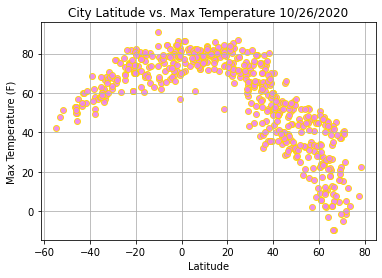

In [27]:
latitude = weather_info['Latitude']

plt.scatter(latitude,weather_info['Max Temperature'],marker="o",facecolors="violet", edgecolors="gold",alpha=0.9)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature 10/28/2020')
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

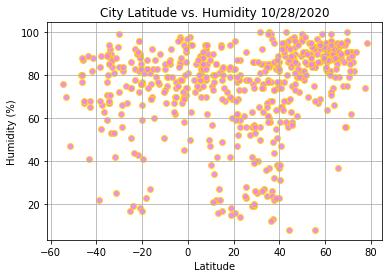

In [29]:
plt.scatter(latitude,weather_data['Humidity'],marker="o",facecolors="violet", edgecolors="gold",alpha=0.9)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity 10/28/2020')
plt.grid()
plt.show()


## Latitude vs. Cloudiness Plot

## Latitude vs. Wind Speed Plot

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression